In [1]:
#Librerías ensenciales
import pandas as pd # Para manejo de datos
import numpy as np # Para operaciones numéricas
import seaborn as sns # Para gráficos estadísticos
import missingno as msno # Para visualizar datos faltantes
import matplotlib.pyplot as plt # Creación de gráficos
sns.set(style="whitegrid") #utilidades especificas para visualización
plt.rcParams["figure.figsize"] = (10, 6) #utilidades especificas para visualización

# 1. Obtención del dataset y primer vistazo a los datos


In [4]:
# Cargar el dataset
df = pd.read_csv("../csv/WA_Fn-UseC_-Telco-Customer-Churn.csv ")
#df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv") esta linea es para leer el cv en google collab
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Vista general de las variables numéricas
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Voy a cambiar el tipo de dato que no será necesario tras la limpieza a la columna TotalCharges


In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 2. Análisis Univariado - Métricas Numéricas

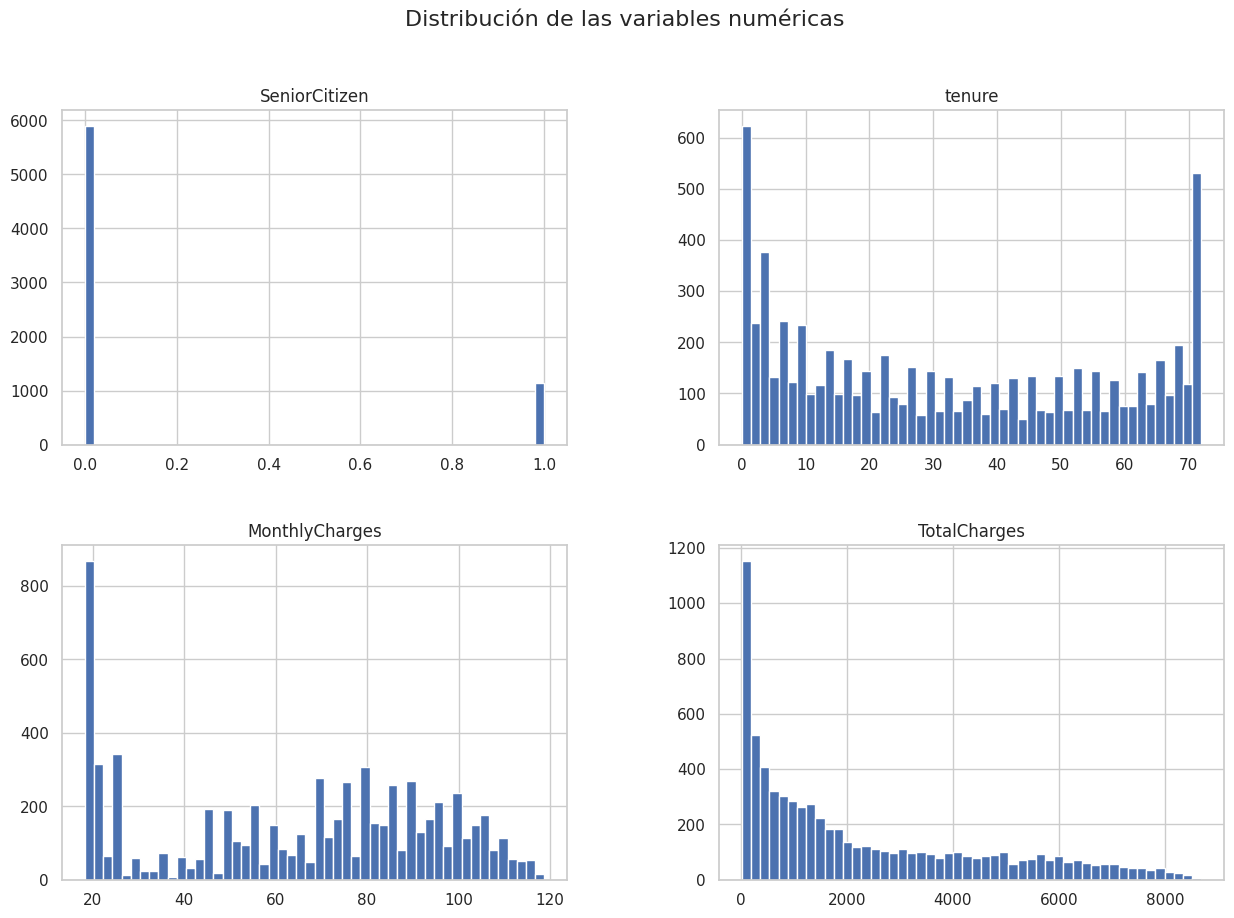

In [8]:
variables_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
df[variables_numericas].hist(bins=50, figsize=(15, 10))

plt.suptitle("Distribución de las variables numéricas", fontsize=16)
plt.show()

# 3. Análisis de Correlación

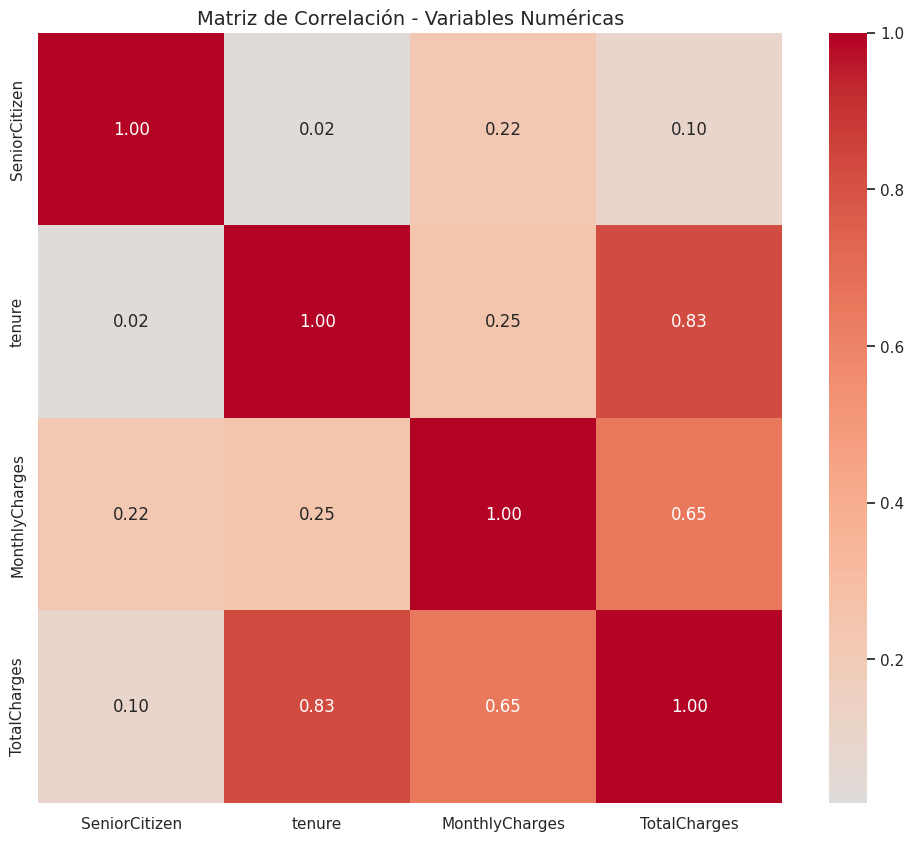

In [9]:
numeric_cols = df[variables_numericas]
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Matriz de Correlación - Variables Numéricas", fontsize=14)
plt.show()

# 4. Detección de Outliers

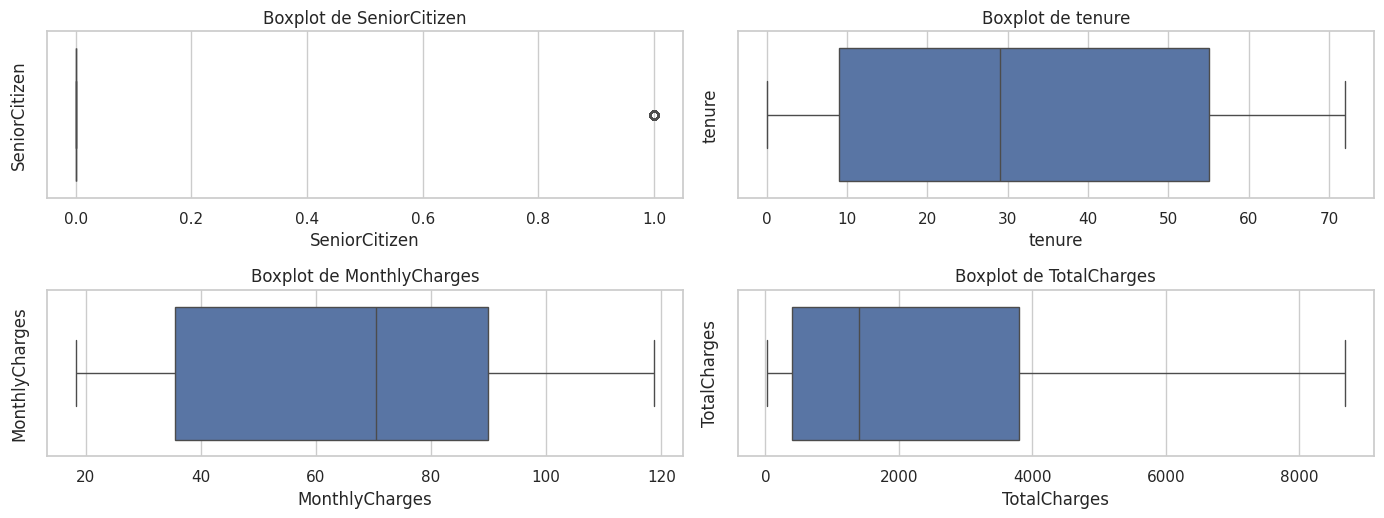

In [10]:
plt.figure(figsize=(14,10))

# Ajustamos la cuadrícula a 4 filas y 2 columnas para acomodar los gráficos
for i, col in enumerate(variables_numericas, 1):
    plt.subplot(4, 2, i) # Cambiamos de 3, 2 a 4, 2
    sns.boxplot(
        x=df[col], # Aquí se define como se muestra el boxplot, en horizontal o vertical
        orient='h'       # Esto hace automáticamente los quartiles
    )
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

## 5. Convertir Churn a formato numérico y comparación con las variables numéricas

Transformar la variable categórica 'Churn' en un formato numérico binario (por ejemplo, 'Yes' a 1 y 'No' a 0) para facilitar el análisis cuantitativo y el cálculo de correlaciones con otras variables numéricas.


In [15]:
#Creación de una nueva columna en formato binario
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_binary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


# 6. Comparar cantidad de datos con Churn binary

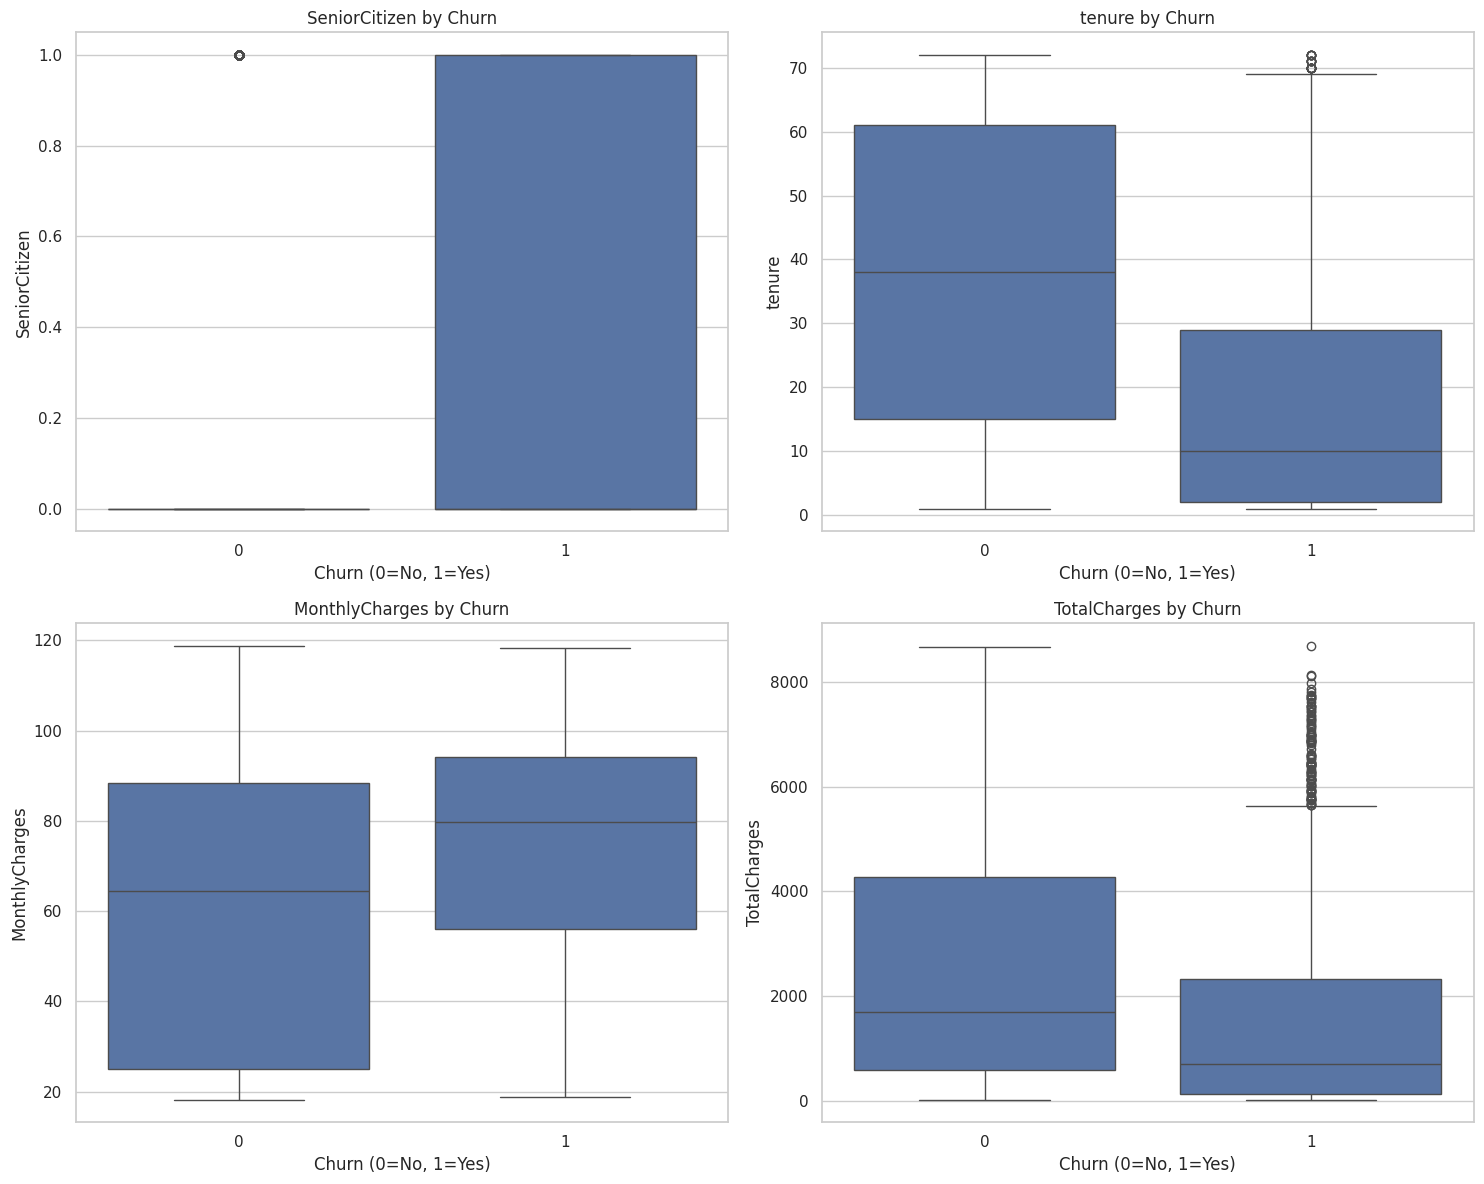

In [16]:
plt.figure(figsize=(15, 12))
for idx, col in enumerate(variables_numericas):
    plt.subplot(2, 2, idx + 1)
    sns.boxplot(x='Churn_binary', y=col, data=df)
    plt.title(f'{col} by Churn')
    plt.xlabel('Churn (0=No, 1=Yes)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [19]:
correlation_with_churn = df.corr(numeric_only=True)['Churn_binary'].sort_values(ascending=False)
print("Correlations with Churn_binary:\n", correlation_with_churn)

Correlations with Churn_binary:
 Churn_binary      1.000000
MonthlyCharges    0.192858
SeniorCitizen     0.150541
TotalCharges     -0.199484
tenure           -0.354049
Name: Churn_binary, dtype: float64


### Visualizar la correlación con Churn usando un mapa de calor

Representar gráficamente la correlación entre la variable Churn y las demás variables numéricas mediante un mapa de calor (heatmap), lo que permite identificar de forma rápida e intuitiva qué características están más fuertemente asociadas con la rotación de clientes.

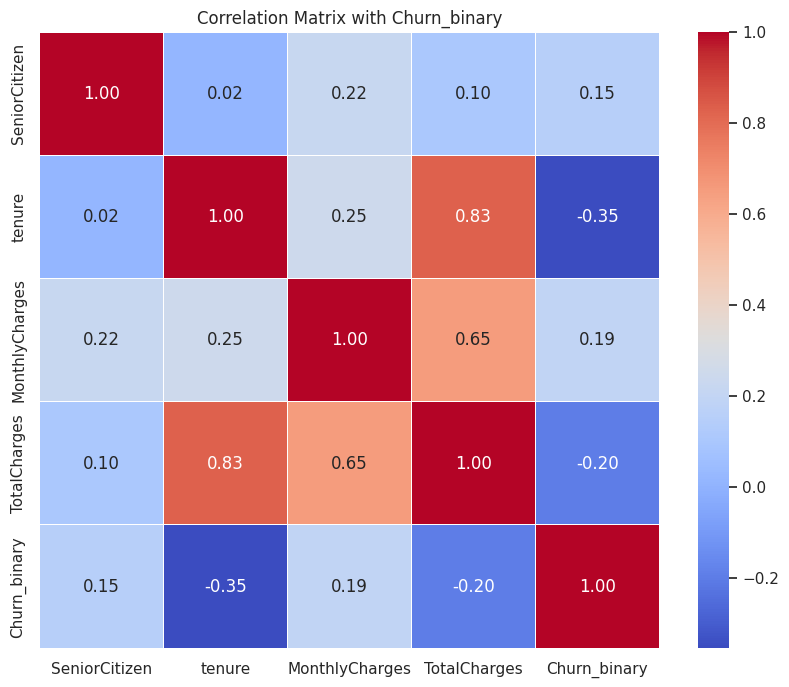

In [21]:
numeric_cols_with_churn = variables_numericas + ['Churn_binary']
correlation_matrix_with_churn = df[numeric_cols_with_churn].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_churn, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix with Churn_binary')
plt.show()

## Resumen de Hallazgos Clave del Análisis Exploratorio de Datos (EDA) de Variables Numéricas

### Perspectivas del Análisis de Datos

*   **La Antigüedad (Tenure) es un fuerte indicador de abandono (Churn)**: Existe una correlación negativa significativa de -0.354049 entre la `tenure` y el `churn`, lo que indica que los clientes con menor antigüedad (clientes más nuevos) son considerablemente más propensos a la baja del servicio.
*   **Los Cargos Mensuales (MonthlyCharges) influyen en el abandono**: Se observó una correlación positiva de 0.192858 entre `MonthlyCharges` y el `churn`, lo que sugiere que los clientes con cargos mensuales más altos son ligeramente más propensos a darse de baja.
*   **Los Cargos Totales (TotalCharges) inversamente relacionados con el abandono**: `TotalCharges` mostró una correlación negativa de -0.199484 con el `churn`, lo que implica que los clientes con cargos totales más bajos son algo más propensos a darse de baja, posiblemente debido a que son clientes más nuevos que aún no han acumulado cargos elevados.
*   **Los Ciudadanos Mayores (SeniorCitizen) son más propensos a la baja**: Existe una correlación positiva de 0.150541 entre el estado de `SeniorCitizen` y el `churn`, lo que sugiere que los ciudadanos mayores son ligeramente más propensos a darse de baja en comparación con los no mayores.

### Implicaciones o Próximos Pasos

*   Enfocarse en estrategias de incorporación y compromiso inicial para nuevos clientes, dada la fuerte relación inversa entre la `tenure` y el `churn`, para mejorar la retención de clientes desde el principio.
*   Investigar las razones específicas por las cuales los ciudadanos mayores y los clientes con `MonthlyCharges` más altos son más propensos a darse de baja, para desarrollar programas de retención dirigidos o ajustar los modelos de precios.